Here is the Link 👉 [Google-Colab](https://colab.research.google.com/drive/1UbpWMN395qEaxjwtfWhgLTYe4nIGtnzT#scrollTo=0e178e17)



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import os

# Download the Data through Kaggle API
from google.colab import files

In [3]:
import numpy as np
import os
from glob import glob
import matplotlib.pyplot as plt
!pip install opendatasets
import opendatasets as od

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
# Using Kaggle API to Download the Dataset

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 67 bytes


In [5]:
# Download the Dataset
!kaggle datasets download -d csafrit2/plant-leaves-for-image-classification

100% 6.56G/6.56G [00:36<00:00, 273MB/s]
100% 6.56G/6.56G [00:36<00:00, 195MB/s]


In [6]:
from zipfile import ZipFile
file_name = "/content/plant-leaves-for-image-classification.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')
  zip.extractall(path="/content")

Done


In [7]:
train_path = "/content/Plants_2/train"  
test_path = "/content/Plants_2/test/"    

In [8]:
for folder_path in [train_path, test_path]:
    print('Folder:', folder_path)
    # Iterate through each subfolder
    for subfolder_name in os.listdir(folder_path):
        subfolder_path = os.path.join(folder_path, subfolder_name)
        # Count the number of images in the subfolder
        num_images = len(os.listdir(subfolder_path))
        print('    Subfolder:', subfolder_name, '- Num images:', num_images)


Folder: /content/Plants_2/train
    Subfolder: Jatropha healthy (P6a) - Num images: 123
    Subfolder: Alstonia Scholaris healthy (P2b) - Num images: 168
    Subfolder: Gauva diseased (P3b) - Num images: 131
    Subfolder: Mango healthy (P0a) - Num images: 159
    Subfolder: Jamun diseased (P5b) - Num images: 335
    Subfolder: Chinar healthy (P11a) - Num images: 93
    Subfolder: Pomegranate healthy (P9a) - Num images: 277
    Subfolder: Lemon diseased (P10b) - Num images: 67
    Subfolder: Chinar diseased (P11b) - Num images: 110
    Subfolder: Arjun diseased (P1a) - Num images: 222
    Subfolder: Alstonia Scholaris diseased (P2a) - Num images: 244
    Subfolder: Pongamia Pinnata healthy (P7a) - Num images: 312
    Subfolder: Pongamia Pinnata diseased (P7b) - Num images: 265
    Subfolder: Basil healthy (P8) - Num images: 137
    Subfolder: Mango diseased (P0b) - Num images: 255
    Subfolder: Arjun healthy (P1b) - Num images: 210
    Subfolder: Gauva healthy (P3a) - Num images: 267


Folder: /content/Plants_2/train


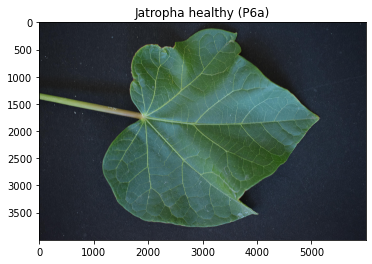

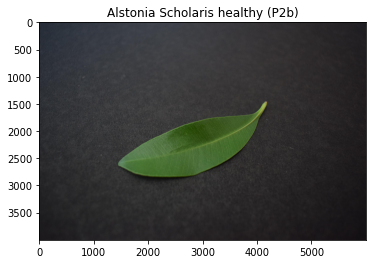

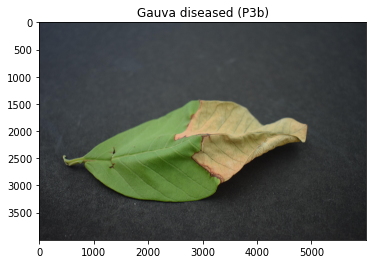

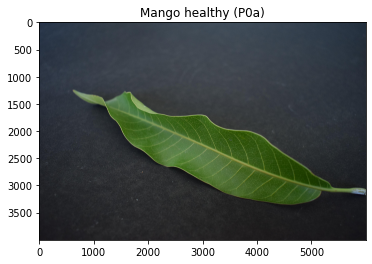

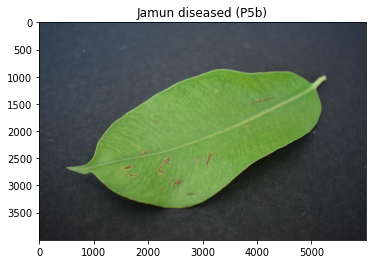

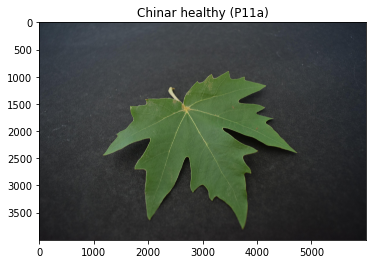

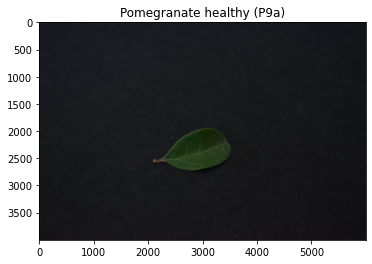

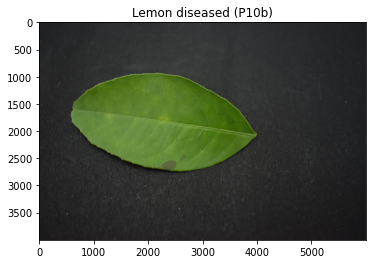

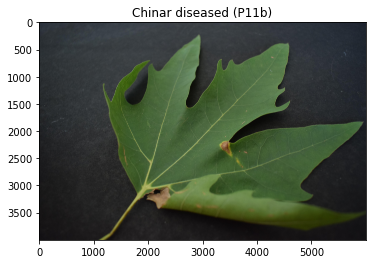

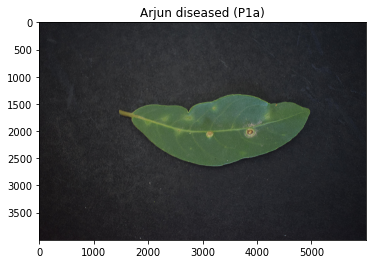

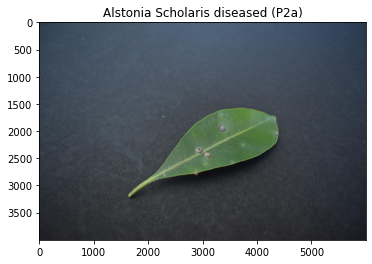

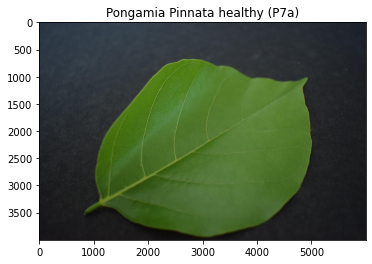

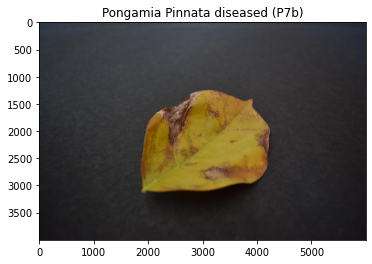

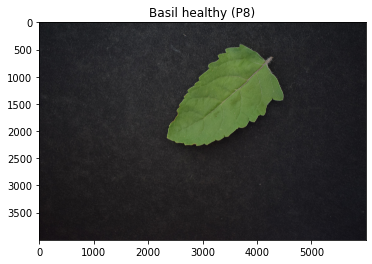

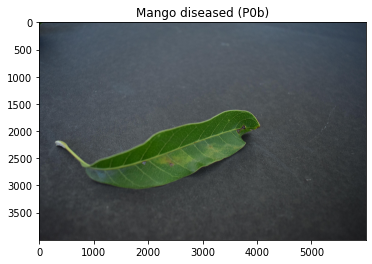

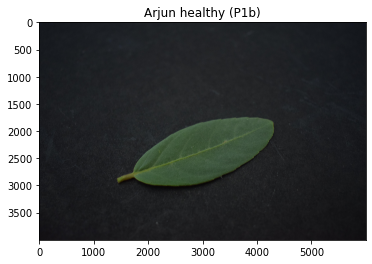

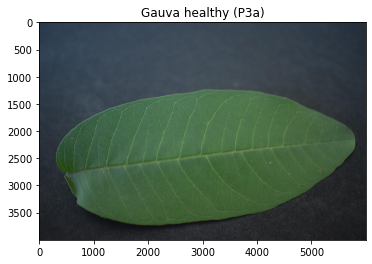

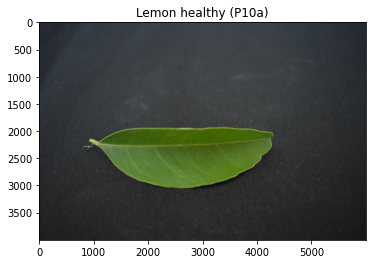

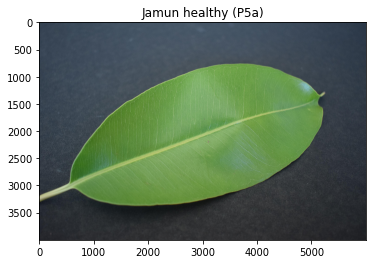

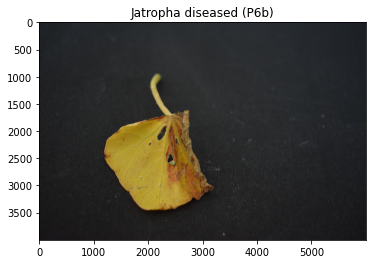

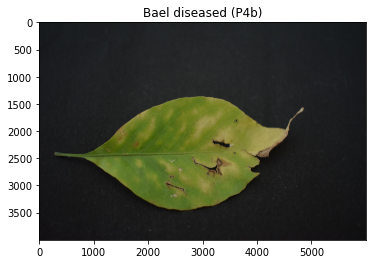

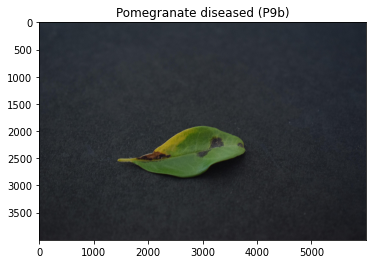

Folder: /content/Plants_2/test/


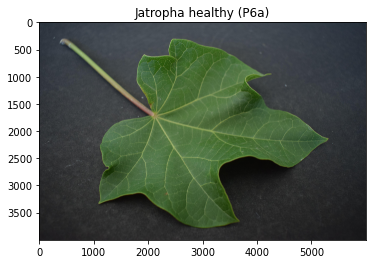

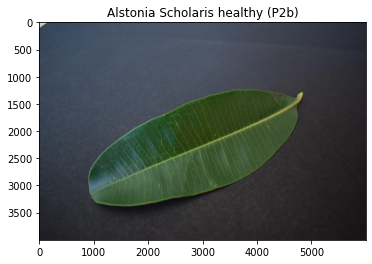

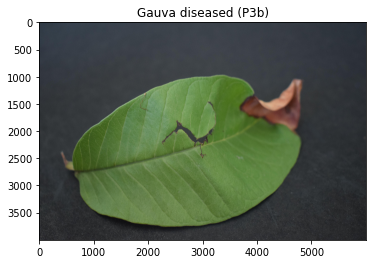

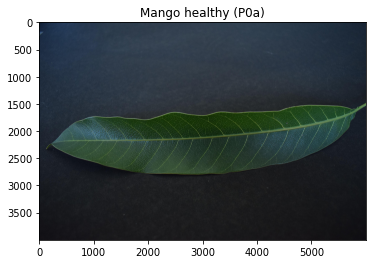

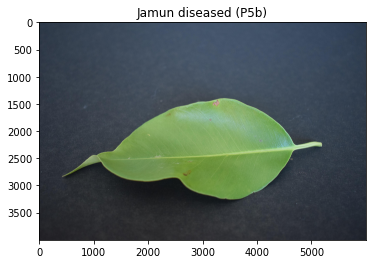

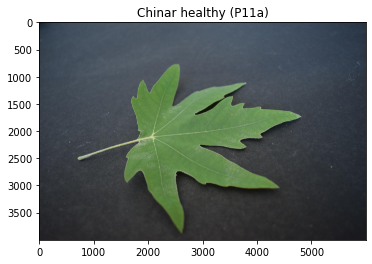

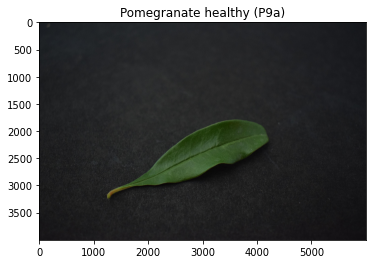

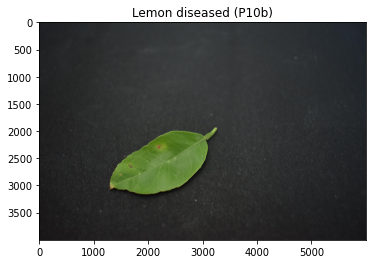

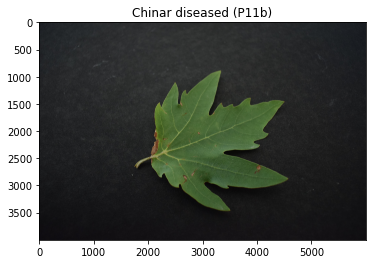

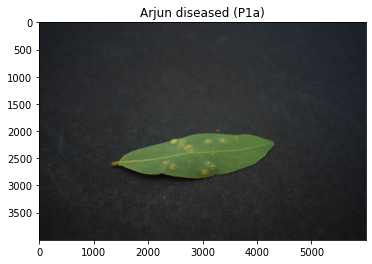

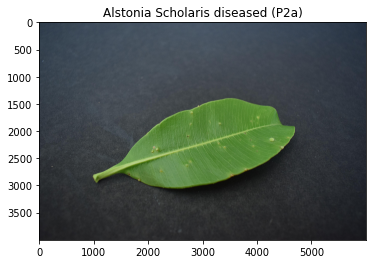

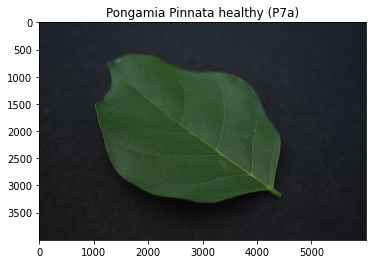

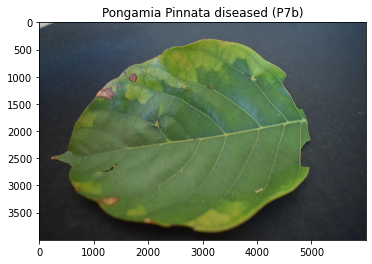

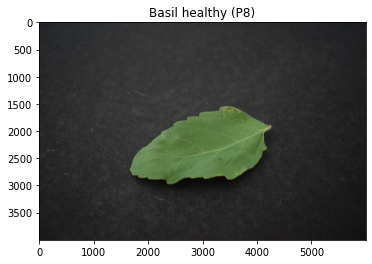

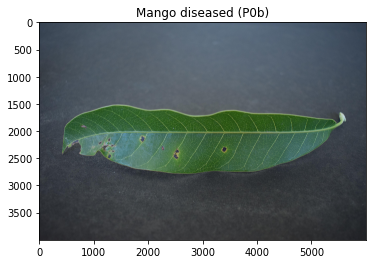

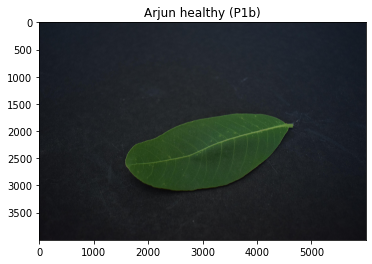

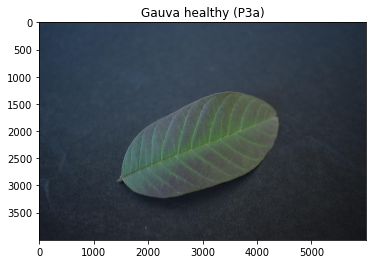

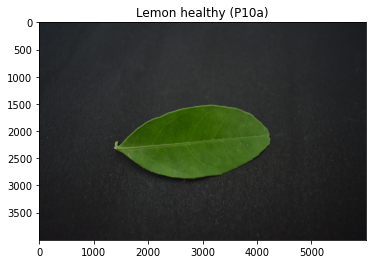

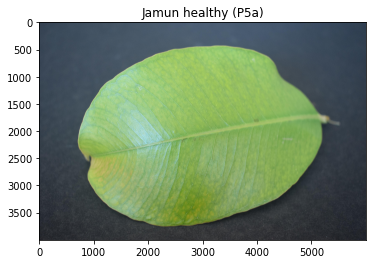

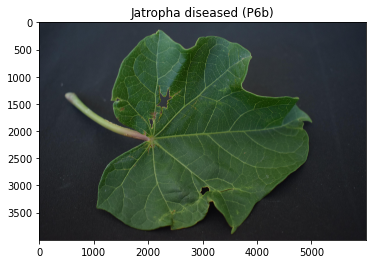

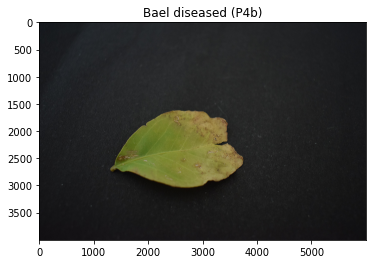

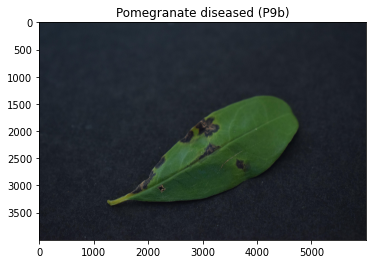

In [9]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the number of random images to display from each subfolder
num_images_to_display = 1

# Iterate through the train and test folders
for folder_path in [train_path, test_path]:
    print('Folder:', folder_path)
    # Iterate through each subfolder
    for subfolder_name in os.listdir(folder_path):
        subfolder_path = os.path.join(folder_path, subfolder_name)
        # Count the number of images in the subfolder
        num_images = len(os.listdir(subfolder_path))
        # Select some random images to display
        image_names = random.sample(os.listdir(subfolder_path), num_images_to_display)
        # Display the images
        for image_name in image_names:
            image_path = os.path.join(subfolder_path, image_name)
            image = mpimg.imread(image_path)
            plt.imshow(image)
            plt.title(subfolder_name)
            plt.show()


In [10]:
batch_size = 32
img_height = 224
img_width = 224

In [11]:
import pathlib
train_dir = "/content/Plants_2/train"
data_dir = pathlib.Path(train_dir)

In [12]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4274 files belonging to 22 classes.
Using 3420 files for training.


In [13]:
test_dir = "/content/Plants_2/test"
data_dir = pathlib.Path(test_dir)

In [14]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 110 files belonging to 22 classes.
Using 22 files for validation.


In [15]:
class_names = train_ds.class_names
print(class_names)

['Alstonia Scholaris diseased (P2a)', 'Alstonia Scholaris healthy (P2b)', 'Arjun diseased (P1a)', 'Arjun healthy (P1b)', 'Bael diseased (P4b)', 'Basil healthy (P8)', 'Chinar diseased (P11b)', 'Chinar healthy (P11a)', 'Gauva diseased (P3b)', 'Gauva healthy (P3a)', 'Jamun diseased (P5b)', 'Jamun healthy (P5a)', 'Jatropha diseased (P6b)', 'Jatropha healthy (P6a)', 'Lemon diseased (P10b)', 'Lemon healthy (P10a)', 'Mango diseased (P0b)', 'Mango healthy (P0a)', 'Pomegranate diseased (P9b)', 'Pomegranate healthy (P9a)', 'Pongamia Pinnata diseased (P7b)', 'Pongamia Pinnata healthy (P7a)']


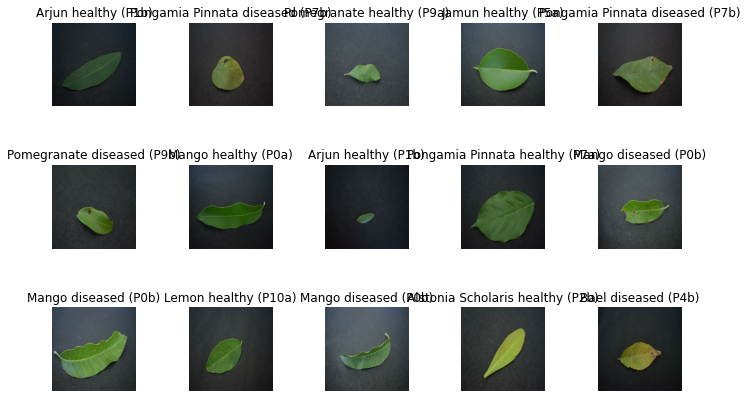

In [16]:
# Visualize the data
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
  for i in range(15):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

plt.subplots_adjust(wspace=0.1, hspace=0.7)
plt.show()


In [17]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break


(32, 224, 224, 3)
(32,)


In [18]:
# Configure the dataset for performance
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [19]:
# Standardize the data

In [20]:
normalization_layer = layers.Rescaling(1./255)

In [21]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


0.0 0.6632663


In [22]:
# A Keras model

In [23]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [24]:
# Compile the model

In [25]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [26]:
# Model summary

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        1

In [28]:
# Train the model
epochs=100
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/100
107/107 [==============================] - 17s 52ms/step - loss: 2.0852 - accuracy: 0.3643 - val_loss: 1.6198 - val_accuracy: 0.6364
Epoch 2/100
107/107 [==============================] - 3s 29ms/step - loss: 0.7196 - accuracy: 0.7845 - val_loss: 0.9444 - val_accuracy: 0.7727
Epoch 3/100
107/107 [==============================] - 3s 29ms/step - loss: 0.3623 - accuracy: 0.8795 - val_loss: 1.1581 - val_accuracy: 0.7727
Epoch 4/100
107/107 [==============================] - 3s 29ms/step - loss: 0.2475 - accuracy: 0.9190 - val_loss: 0.9236 - val_accuracy: 0.7727
Epoch 5/100
107/107 [==============================] - 3s 28ms/step - loss: 0.1657 - accuracy: 0.9465 - val_loss: 1.3439 - val_accuracy: 0.8636
Epoch 6/100
107/107 [==============================] - 3s 28ms/step - loss: 0.0754 - accuracy: 0.9775 - val_loss: 1.3427 - val_accuracy: 0.7727
Epoch 7/100
107/107 [==============================] - 3s 28ms/step - loss: 0.0983 - accuracy: 0.9705 - val_loss: 1.3600 - val_accuracy

In [29]:
# Visualize training results

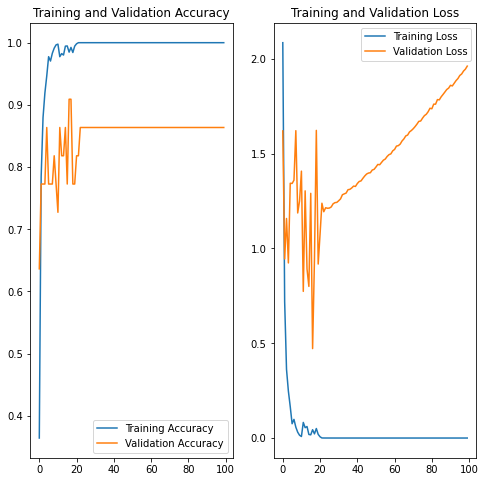

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [31]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

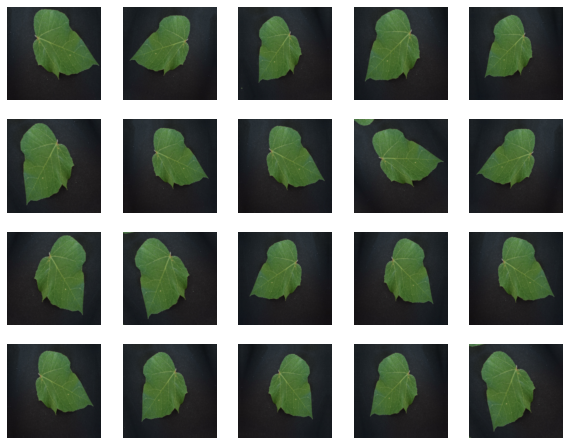

In [32]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(20):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

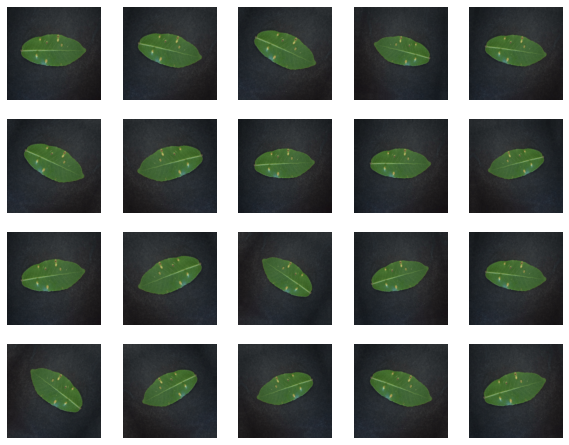

In [33]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(2):
  for i in range(20):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

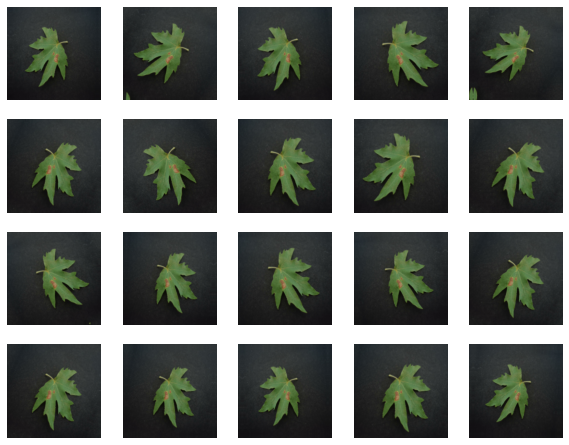

In [34]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(5):
  for i in range(20):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [35]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.3),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [36]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [37]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                  

In [38]:
epochs = 100
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/100


107/107 [==============================] - 22s 160ms/step - loss: 2.3937 - accuracy: 0.2526 - val_loss: 1.9624 - val_accuracy: 0.5455
Epoch 2/100
107/107 [==============================] - 18s 165ms/step - loss: 1.2241 - accuracy: 0.6246 - val_loss: 1.3820 - val_accuracy: 0.6818
Epoch 3/100
107/107 [==============================] - 17s 157ms/step - loss: 0.7765 - accuracy: 0.7547 - val_loss: 1.7445 - val_accuracy: 0.6818
Epoch 4/100
107/107 [==============================] - 18s 165ms/step - loss: 0.5950 - accuracy: 0.8114 - val_loss: 1.7143 - val_accuracy: 0.6818
Epoch 5/100
107/107 [==============================] - 17s 155ms/step - loss: 0.5657 - accuracy: 0.8170 - val_loss: 1.1405 - val_accuracy: 0.8182
Epoch 6/100
107/107 [==============================] - 17s 159ms/step - loss: 0.4546 - accuracy: 0.8550 - val_loss: 1.1182 - val_accuracy: 0.8636
Epoch 7/100
107/107 [==============================] - 17s 156ms/step - loss: 0.3823 - accuracy: 0.8749 - val_loss: 1.3359 - val_accurac

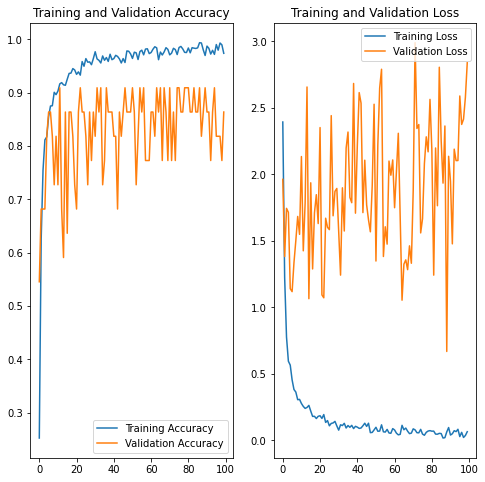

In [39]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')

plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()